In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\projects\bank_churn\Cleaned_data.csv')

In [3]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
gender_counts = df['Gender'].value_counts()
myexplode = [0.1, 0] 
""" value of 0.1 for the first element means the first slice will 
be offset by 10% of the radius, while the 0 for the second element means 
the second slice will not be separated"""
mycolors = ['blue', 'pink']

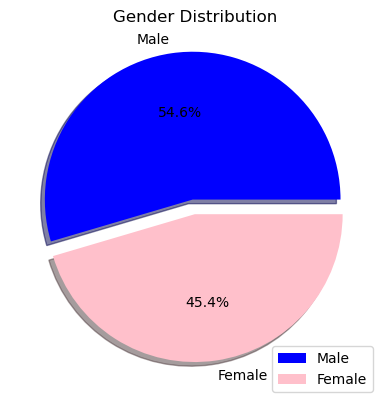

In [5]:
plt.pie(gender_counts, labels=gender_counts.index, explode = myexplode, autopct='%1.1f%%', shadow=True, colors=mycolors)
plt.title('Gender Distribution')
plt.legend()
plt.show()

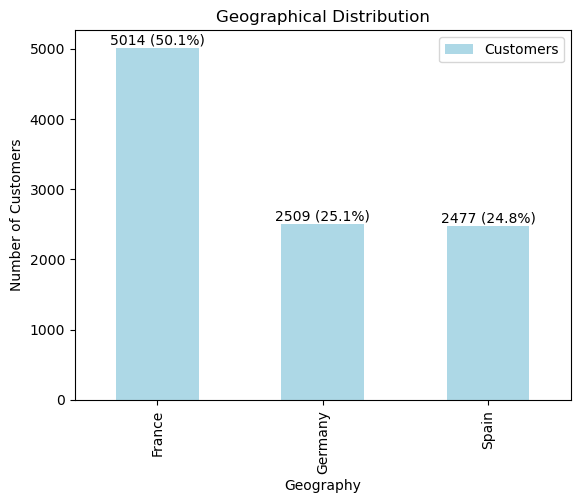

In [14]:

geo_counts = df['Geography'].value_counts()
total = geo_counts.sum()

# Create bar chart
ax = geo_counts.plot(kind='bar', color='lightblue')

# Add title and labels
plt.title('Geographical Distribution')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')

# Add count + percentage labels
for i, count in enumerate(geo_counts):
    percent = (count / total) * 100
    plt.text(i, count + 50, f'{count} ({percent:.1f}%)', ha='center', fontsize=10)

# Optional: custom legend
plt.legend(['Customers'])

plt.show()




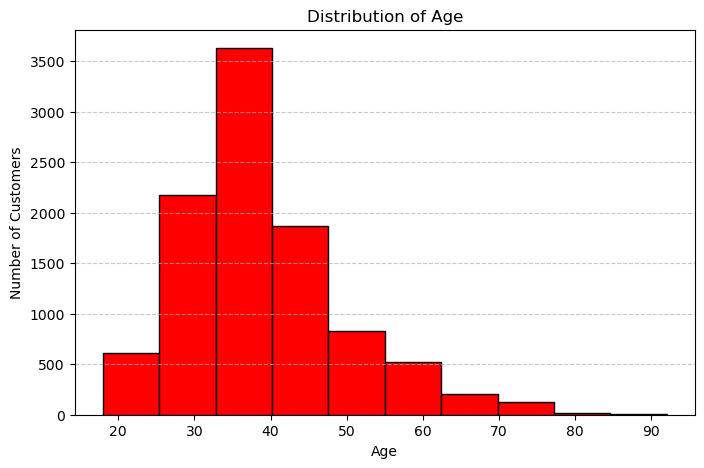

In [31]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=10, color='red', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

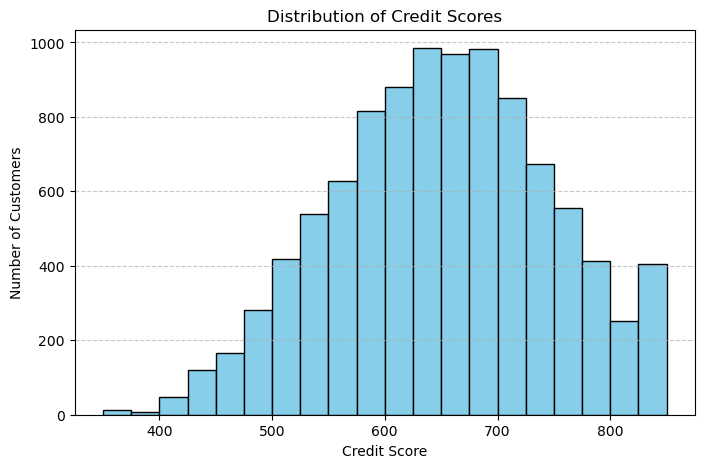

In [33]:
#Insight: Are most customers in the good or poor credit range?
plt.figure(figsize=(8,5))
plt.hist(df['CreditScore'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

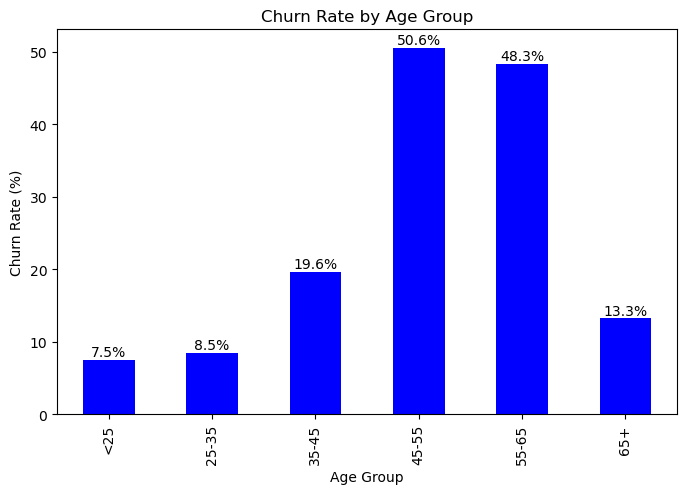

In [41]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_churn = df.groupby('AgeGroup',observed = 'False')['Exited'].mean() * 100 # Convert to percentage

plt.figure(figsize=(8,5))
age_group_churn.plot(kind='bar', color='blue',alpha=1)
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')

# Add percentage labels on top
for i, rate in enumerate(age_group_churn):
    plt.text(i, rate + 0.5, f'{rate:.1f}%', ha='center')

plt.show()